In [1]:
import pickle
import pandas as pd
import os
import numpy as np
import import_ipynb 
from feeds import BackFeed,DataFeed
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
from decision_tree import DecisionTree
from dataclasses import dataclass
from add_features import add_features

importing Jupyter notebook from feeds.ipynb
importing Jupyter notebook from synfeed.ipynb
importing Jupyter notebook from india_calendar.ipynb
importing Jupyter notebook from featfuncs.ipynb


In [2]:
@dataclass
class OptimalData:
    optD: dict
    optR: dict
    optDT: dict
    optRT: dict
    feed_original: pd.DataFrame
    feed_all: pd.DataFrame

In [3]:
path = os.path.join('additional_utils', 'optimal_alldata_new.pkl')
with open(path, 'rb') as f:
    optimal_data = pickle.load(f)

In [4]:
def trainDT(X_train, X_test, y_train, y_test, cols_to_use, y_col, max_depth=2):
    # Fit the classifier with default hyper-parameters
    labels = ['sell', 'buy']
    clf = DecisionTreeClassifier(max_depth=max_depth)
    model = clf.fit(X_train, y_train)
    
    # DOT data
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=cols_to_use,
                                    class_names=labels,
                                    filled=True)
    # Draw graph
    graph = graphviz.Source(dot_data, format="png")
    preds = clf.predict(X_test)
    cm = pd.DataFrame(confusion_matrix(y_test, preds), columns=labels, index=labels)
    report = classification_report(y_test, preds, target_names=labels)
    
    return graph, cm, report

In [5]:
def get_data(df):
    df, pre_discrete_cols, discrete_cols = add_features(df)
    
    df = df[df['Action']!=-5]
    
    
    COLS_TO_USE =  discrete_cols
    y_col='Action'

    n = len(df)
    X = df.loc[:, COLS_TO_USE]
    y = df.loc[:, y_col]

    return df, X, y, COLS_TO_USE, y_col, pre_discrete_cols, discrete_cols

In [6]:
dfs = [optimal_data.feed_original, optimal_data.feed_all]

### Real Optimal (only using 1 starting point)

In [7]:
df1, X1, y1, COLS_TO_USE, y_col, pre_discrete_cols, discrete_cols  = get_data(dfs[0])

In [8]:
df1 = df1.dropna()
indices_to_keep = ~df1.isin([np.nan, np.inf, -np.inf]).any(axis=1)
df1 = df1[indices_to_keep]
X1 = df1.loc[:, COLS_TO_USE]
y1 = df1.loc[:, y_col]

In [9]:
graph, cm, report = trainDT(X1, X1, y1, y1, COLS_TO_USE, y_col=y_col, max_depth=2)
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

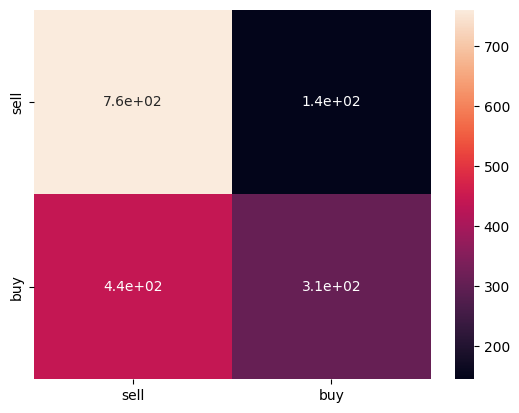

In [10]:
sns.heatmap(cm, annot=True);

In [11]:
print(report)


              precision    recall  f1-score   support

        sell       0.63      0.84      0.72       906
         buy       0.68      0.41      0.51       751

    accuracy                           0.65      1657
   macro avg       0.66      0.63      0.62      1657
weighted avg       0.65      0.65      0.63      1657



In [12]:
from decision_tree import DecisionTree

In [13]:
dt = DecisionTree(max_depth=2)
dt.train(X1, y1)

[INFO] Trained Tree!


In [14]:
dt.score(X1, y1)

              precision    recall  f1-score   support

          -1       0.63      0.84      0.72       906
           1       0.68      0.41      0.51       751

    accuracy                           0.65      1657
   macro avg       0.66      0.63      0.62      1657
weighted avg       0.65      0.65      0.63      1657



In [15]:
dt.visualize()

                                                                                                         Index: 0
                                                                                                         Open-Close_ma_1-Open-Close_ma_50_val >= 2
                                                                                                         Gini: 0.49562489597177206
                                                                                                         Samples: 1657
                                                                                                         Values: {-1: 906, 1: 751}
                                                                                                         Class: -1

                                   Index: 1                                                                                                                                    Index: 2
                                   BBP_5_2.0_slope_1_chang

In [16]:
dt.prune(impurity_thresh=0.45, set_action=0)

[INFO] Pruned leaf with index: 3 as impurity=0.49485402226423025>=thresh=0.45
[INFO] Pruned leaf with index: 5 as impurity=0.4932549013313645>=thresh=0.45
[INFO] Pruning complete!


In [17]:
dt.visualize()

                                                                                                         Index: 0
                                                                                                         Open-Close_ma_1-Open-Close_ma_50_val >= 2
                                                                                                         Gini: 0.49562489597177206
                                                                                                         Samples: 1657
                                                                                                         Values: {-1: 906, 1: 751}
                                                                                                         Class: -1

                                   Index: 1                                                                                                                                    Index: 2
                                   BBP_5_2.0_slope_1_chang

In [18]:
dt.score(X1, y1)

              precision    recall  f1-score   support

          -1       0.74      0.41      0.52       906
           0       0.00      0.00      0.00         0
           1       0.74      0.31      0.44       751

    accuracy                           0.36      1657
   macro avg       0.49      0.24      0.32      1657
weighted avg       0.74      0.36      0.48      1657



/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
dt.save('saved_models/dt_optimal_alldata_original.pkl')

In [20]:
dt = DecisionTree(max_depth=3)
dt.train(X1, y1)

[INFO] Trained Tree!


In [21]:
dt.score(X1, y1)

              precision    recall  f1-score   support

          -1       0.67      0.77      0.72       906
           1       0.66      0.55      0.60       751

    accuracy                           0.67      1657
   macro avg       0.67      0.66      0.66      1657
weighted avg       0.67      0.67      0.67      1657



In [22]:
dt.visualize()

                                                                                                                                                                                                                                                     Index: 0
                                                                                                                                                                                                                                                     Open-Close_ma_1-Open-Close_ma_50_val >= 2
                                                                                                                                                                                                                                                     Gini: 0.49562489597177206
                                                                                                                                                                                            

In [23]:
dt.prune(impurity_thresh=0.48, set_action=0)

[INFO] Prune leaf with index: 10 as                           impurity=0.4832928662273095>=thresh=0.48
[INFO] Pruned leaf with index: 11 as impurity=0.49175153606598776>=thresh=0.48
[INFO] Prune leaf with index: 14 as                           impurity=0.4979971158468195>=thresh=0.48
[INFO] Pruning complete!


In [24]:
dt.visualize()

                                                                                                                                                                                                                                                     Index: 0
                                                                                                                                                                                                                                                     Open-Close_ma_1-Open-Close_ma_50_val >= 2
                                                                                                                                                                                                                                                     Gini: 0.49562489597177206
                                                                                                                                                                                            

In [25]:
dt.score(X1, y1)

              precision    recall  f1-score   support

          -1       0.69      0.72      0.70       906
           0       0.00      0.00      0.00         0
           1       0.75      0.31      0.44       751

    accuracy                           0.54      1657
   macro avg       0.48      0.35      0.38      1657
weighted avg       0.72      0.54      0.59      1657



/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
dt.save('saved_models/dt_optimal_alldata_original_depth_3.pkl')

#### dEPTH=4

In [49]:
dt = DecisionTree(max_depth=4)
dt.train(X1, y1)

[INFO] Trained Tree!


In [50]:
dt.score(X1, y1)

              precision    recall  f1-score   support

          -1       0.68      0.85      0.76       906
           1       0.75      0.52      0.62       751

    accuracy                           0.70      1657
   macro avg       0.71      0.69      0.69      1657
weighted avg       0.71      0.70      0.69      1657



In [51]:
dt.visualize()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Index: 0
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [52]:
dt.prune(impurity_thresh=0.48, set_action=0)

[INFO] Prune leaf with index: 20 as                           impurity=0.4885215794306703>=thresh=0.48
[INFO] Pruned leaf with index: 23 as impurity=0.49441470024456347>=thresh=0.48
[INFO] Pruned leaf with index: 25 as impurity=0.48847345193388336>=thresh=0.48
[INFO] Prune leaf with index: 28 as                           impurity=0.48>=thresh=0.48
[INFO] Pruning complete!


In [53]:
dt.visualize()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Index: 0
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [54]:
dt.score(X1, y1)

              precision    recall  f1-score   support

          -1       0.77      0.53      0.63       906
           0       0.00      0.00      0.00         0
           1       0.77      0.48      0.59       751

    accuracy                           0.51      1657
   macro avg       0.51      0.34      0.41      1657
weighted avg       0.77      0.51      0.61      1657



/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dt.save('saved_models/dt_optimal_alldata_original_depth_4.pkl')

### Optimal, Real, Using all starting points

#### Depth=2

In [27]:
df2, X2, y2, COLS_TO_USE, y_col, pre_discrete_cols, discrete_cols  = get_data(dfs[1])

In [28]:
df2 = df2.dropna()
indices_to_keep = ~df2.isin([np.nan, np.inf, -np.inf]).any(axis=1)
df2 = df2[indices_to_keep]
X2 = df2.loc[:, COLS_TO_USE]
y2 = df2.loc[:, y_col]

In [29]:
graph, cm, report = trainDT(X2, X2, y2, y2, COLS_TO_USE, y_col=y_col, max_depth=2)
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

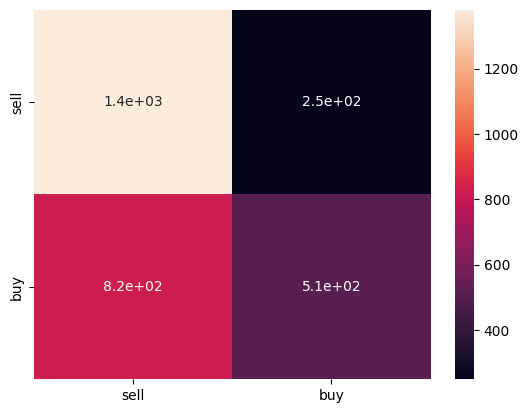

In [30]:
sns.heatmap(cm, annot=True);

In [31]:
print(report)


              precision    recall  f1-score   support

        sell       0.63      0.85      0.72      1629
         buy       0.67      0.38      0.49      1333

    accuracy                           0.64      2962
   macro avg       0.65      0.62      0.60      2962
weighted avg       0.65      0.64      0.62      2962



In [32]:
from decision_tree import DecisionTree

In [33]:
dt = DecisionTree(max_depth=2)
dt.train(X2, y2)

[INFO] Trained Tree!


In [34]:
dt.score(X2, y2)

              precision    recall  f1-score   support

          -1       0.63      0.85      0.72      1629
           1       0.67      0.38      0.49      1333

    accuracy                           0.64      2962
   macro avg       0.65      0.62      0.60      2962
weighted avg       0.65      0.64      0.62      2962



In [35]:
dt.visualize()

                                                                                                         Index: 0
                                                                                                         Open-Close_ma_1-Open-Close_ma_10_val >= 2
                                                                                                         Gini: 0.4950067499148567
                                                                                                         Samples: 2962
                                                                                                         Values: {-1: 1629, 1: 1333}
                                                                                                         Class: -1

                                   Index: 1                                                                                                                                    Index: 2
                                   Close_slope_1_polarity

In [36]:
dt.prune(impurity_thresh=0.46, set_action=0)

[INFO] Pruned leaf with index: 3 as impurity=0.47530864197530853>=thresh=0.46
[INFO] Pruned leaf with index: 5 as impurity=0.4894381927130518>=thresh=0.46
[INFO] Pruning complete!


In [37]:
dt.visualize()

                                                                                                         Index: 0
                                                                                                         Open-Close_ma_1-Open-Close_ma_10_val >= 2
                                                                                                         Gini: 0.4950067499148567
                                                                                                         Samples: 2962
                                                                                                         Values: {-1: 1629, 1: 1333}
                                                                                                         Class: -1

                                   Index: 1                                                                                                                                    Index: 2
                                   Close_slope_1_polarity

In [38]:
dt.score(X2, y2)

              precision    recall  f1-score   support

          -1       0.71      0.37      0.48      1629
           0       0.00      0.00      0.00         0
           1       0.67      0.38      0.49      1333

    accuracy                           0.38      2962
   macro avg       0.46      0.25      0.32      2962
weighted avg       0.69      0.38      0.49      2962



/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
dt.save('saved_models/dt_optimal_alldata_all.pkl')

#### Depth=3

In [40]:
from decision_tree import DecisionTree

In [42]:
dt = DecisionTree(max_depth=3)
dt.train(X2, y2)

[INFO] Trained Tree!


In [43]:
dt.score(X2, y2)

              precision    recall  f1-score   support

          -1       0.65      0.78      0.71      1629
           1       0.65      0.48      0.55      1333

    accuracy                           0.65      2962
   macro avg       0.65      0.63      0.63      2962
weighted avg       0.65      0.65      0.64      2962



In [44]:
dt.visualize()

                                                                                                                                                                                                                                                     Index: 0
                                                                                                                                                                                                                                                     Open-Close_ma_1-Open-Close_ma_10_val >= 2
                                                                                                                                                                                                                                                     Gini: 0.4950067499148567
                                                                                                                                                                                             

In [45]:
dt.prune(impurity_thresh=0.47, set_action=0)

[INFO] Prune leaf with index: 10 as                           impurity=0.4872000000000001>=thresh=0.47
[INFO] Pruned leaf with index: 11 as impurity=0.4993141289437586>=thresh=0.47
[INFO] Prune leaf with index: 12 as                           impurity=0.4810305478943888>=thresh=0.47
[INFO] Prune leaf with index: 14 as                           impurity=0.4933129714470823>=thresh=0.47
[INFO] Pruning complete!


In [46]:
dt.visualize()

                                                                                                                                                                                                                                                     Index: 0
                                                                                                                                                                                                                                                     Open-Close_ma_1-Open-Close_ma_10_val >= 2
                                                                                                                                                                                                                                                     Gini: 0.4950067499148567
                                                                                                                                                                                             

In [47]:
dt.score(X2, y2)

              precision    recall  f1-score   support

          -1       0.74      0.35      0.47      1629
           0       0.00      0.00      0.00         0
           1       0.69      0.38      0.49      1333

    accuracy                           0.36      2962
   macro avg       0.48      0.24      0.32      2962
weighted avg       0.72      0.36      0.48      2962



/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
dt.save('saved_models/dt_optimal_alldata_all_depth_3.pkl')

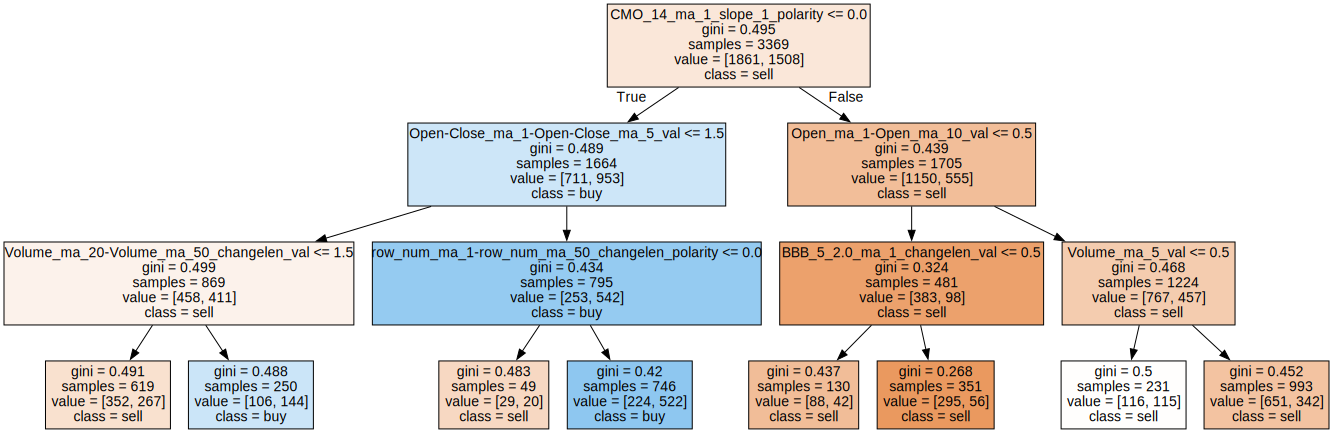

In [ ]:
graph, cm, report = trainDT(X2, X2, y2, y2, COLS_TO_USE, y_col=y_col, max_depth=3)
graph

### Synthetic (hp_11), one starting point

In [ ]:
path = os.path.join('additional_utils', 'optimal_synthetic_hp11.pkl')
with open(path, 'rb') as f:
    optimal_data = pickle.load(f)

In [ ]:
dfs = [optimal_data.feed_original, optimal_data.feed_all]

In [ ]:
df1, X1, y1, COLS_TO_USE, y_col, pre_discrete_cols, discrete_cols  = get_data(dfs[0])

In [ ]:
df1 = df1.dropna()
indices_to_keep = ~df1.isin([np.nan, np.inf, -np.inf]).any(axis=1)
df1 = df1[indices_to_keep]
X1 = df1.loc[:, COLS_TO_USE]
y1 = df1.loc[:, y_col]

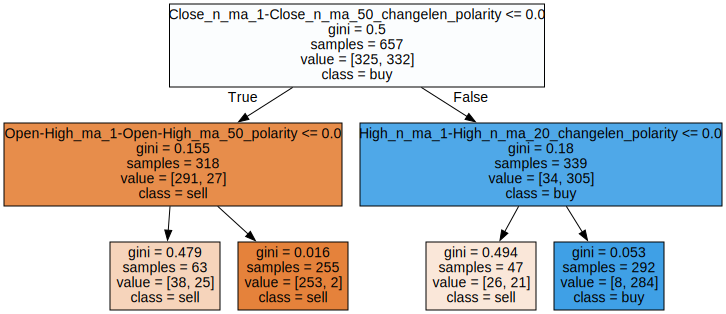

In [ ]:
graph, cm, report = trainDT(X1, X1, y1, y1, COLS_TO_USE, y_col=y_col, max_depth=2)
graph

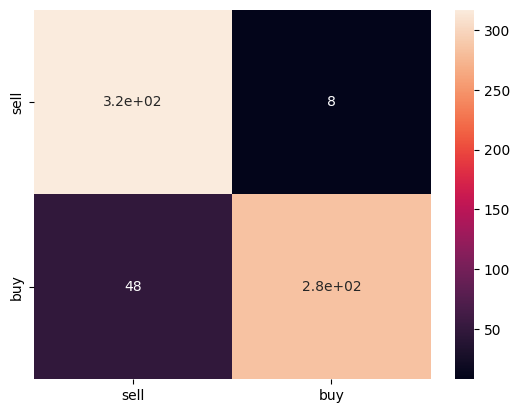

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(report)


              precision    recall  f1-score   support

        sell       0.87      0.98      0.92       325
         buy       0.97      0.86      0.91       332

    accuracy                           0.91       657
   macro avg       0.92      0.92      0.91       657
weighted avg       0.92      0.91      0.91       657



In [ ]:
from decision_tree import DecisionTree

In [ ]:
dt = DecisionTree(max_depth=2)
dt.train(X1, y1)

[INFO] Trained Tree!


In [ ]:
dt.score(X1, y1)

              precision    recall  f1-score   support

          -1       0.87      0.98      0.92       325
           1       0.97      0.86      0.91       332

    accuracy                           0.91       657
   macro avg       0.92      0.92      0.91       657
weighted avg       0.92      0.91      0.91       657



In [ ]:
dt.visualize()

                                                                                                         Index: 0
                                                                                                         Close_n_ma_1-Close_n_ma_50_changelen_polarity >= 1
                                                                                                         Gini: 0.49994324092028486
                                                                                                         Samples: 657
                                                                                                         Values: {1: 332, -1: 325}
                                                                                                         Class: 1

                                   Index: 1                                                                                                                                    Index: 2
                                   High_n_ma_1-High

In [ ]:
dt.prune(impurity_thresh=0.45, set_action=0)

[INFO] Prune leaf with index: 4 as                           impurity=0.4943413309189678>=thresh=0.45
[INFO] Prune leaf with index: 6 as                           impurity=0.47871000251952633>=thresh=0.45
[INFO] Pruning complete!


In [ ]:
dt.visualize()

                                                                                                         Index: 0
                                                                                                         Close_n_ma_1-Close_n_ma_50_changelen_polarity >= 1
                                                                                                         Gini: 0.49994324092028486
                                                                                                         Samples: 657
                                                                                                         Values: {1: 332, -1: 325}
                                                                                                         Class: 1

                                   Index: 1                                                                                                                                    Index: 2
                                   High_n_ma_1-High

In [ ]:
dt.score(X1, y1)

              precision    recall  f1-score   support

          -1       0.99      0.78      0.87       325
           0       0.00      0.00      0.00         0
           1       0.97      0.86      0.91       332

    accuracy                           0.82       657
   macro avg       0.65      0.54      0.59       657
weighted avg       0.98      0.82      0.89       657



/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dt.save('saved_models/dt_optimal_synthetic_hp11.pkl')

### Synthetic All

In [ ]:
path = os.path.join('additional_utils', 'optimal_synthetic_hp11.pkl')
with open(path, 'rb') as f:
    optimal_data = pickle.load(f)

In [ ]:
dfs = [optimal_data.feed_original, optimal_data.feed_all]

In [ ]:
df1, X1, y1, COLS_TO_USE, y_col, pre_discrete_cols, discrete_cols  = get_data(dfs[1])

In [ ]:
df1 = df1.dropna()
indices_to_keep = ~df1.isin([np.nan, np.inf, -np.inf]).any(axis=1)
df1 = df1[indices_to_keep]
X1 = df1.loc[:, COLS_TO_USE]
y1 = df1.loc[:, y_col]

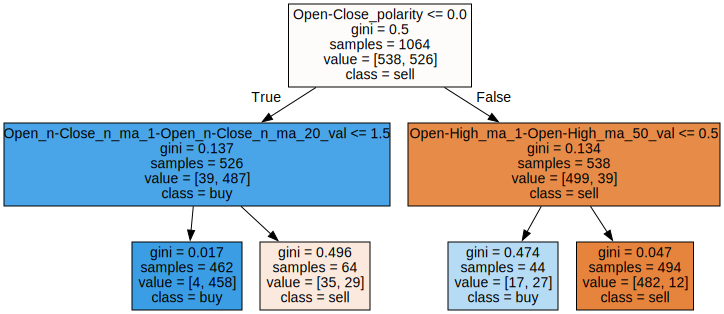

In [ ]:
graph, cm, report = trainDT(X1, X1, y1, y1, COLS_TO_USE, y_col=y_col, max_depth=2)
graph

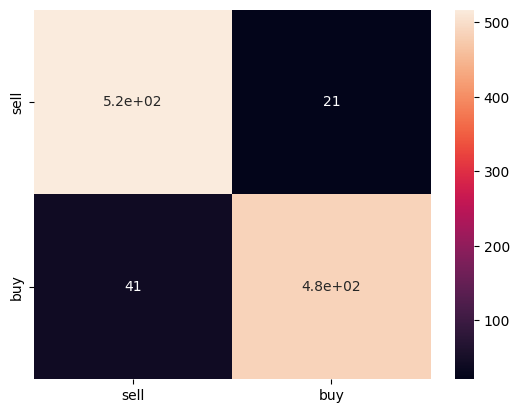

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(report)


              precision    recall  f1-score   support

        sell       0.93      0.96      0.94       538
         buy       0.96      0.92      0.94       526

    accuracy                           0.94      1064
   macro avg       0.94      0.94      0.94      1064
weighted avg       0.94      0.94      0.94      1064



In [ ]:
from decision_tree import DecisionTree

In [ ]:
dt = DecisionTree(max_depth=2)
dt.train(X1, y1)

[INFO] Trained Tree!


In [ ]:
dt.score(X1, y1)

              precision    recall  f1-score   support

          -1       0.93      0.96      0.94       538
           1       0.96      0.92      0.94       526

    accuracy                           0.94      1064
   macro avg       0.94      0.94      0.94      1064
weighted avg       0.94      0.94      0.94      1064



In [ ]:
dt.visualize()

                                                                                                         Index: 0
                                                                                                         Open-Close_polarity >= 1
                                                                                                         Gini: 0.4999364011532591
                                                                                                         Samples: 1064
                                                                                                         Values: {-1: 538, 1: 526}
                                                                                                         Class: -1

                                   Index: 1                                                                                                                                    Index: 2
                                   Open-High_ma_1-Open-High_ma_50_val >= 1  

In [ ]:
dt.prune(impurity_thresh=0.4, set_action=0)

[INFO] Prune leaf with index: 4 as                           impurity=0.47417355371900827>=thresh=0.4
[INFO] Pruned leaf with index: 5 as impurity=0.49560546875>=thresh=0.4
[INFO] Pruning complete!


In [ ]:
dt.visualize()

                                                                                                         Index: 0
                                                                                                         Open-Close_polarity >= 1
                                                                                                         Gini: 0.4999364011532591
                                                                                                         Samples: 1064
                                                                                                         Values: {-1: 538, 1: 526}
                                                                                                         Class: -1

                                   Index: 1                                                                                                                                    Index: 2
                                   Open-High_ma_1-Open-High_ma_50_val >= 1  

In [ ]:
dt.score(X1, y1)

              precision    recall  f1-score   support

          -1       0.98      0.90      0.93       538
           0       0.00      0.00      0.00         0
           1       0.99      0.87      0.93       526

    accuracy                           0.88      1064
   macro avg       0.66      0.59      0.62      1064
weighted avg       0.98      0.88      0.93      1064



/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishabh/miniforge3/envs/metarl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dt.save('saved_models/dt_optimal_synthetic_all_hp11.pkl')